In [58]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sqlalchemy import create_engine
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [59]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000) 
pd.set_option('display.max_colwidth', None)

In [60]:
script_dir = Path.cwd()

baseTablePath = script_dir.parent.parent/"data"/"analysis_base_clean.csv"
df = pd.read_csv(baseTablePath)

df.dropna(inplace = True)

In [61]:
df['early_onset_proxy'] = df['age_years'].apply(lambda x: 1 if x <=50 else 0)
df.drop(columns=['bmx_weight_kg','bmx_height_cm','bmx_waist_cm','bmx_hip_cm','mcq220'], inplace = True)

In [99]:
vars_cont = ['age_years', 'pir', 'dpq_total', 'hscrp_mg_l_raw', 'bmx_bmi']
vars_cat  = [ 'smoke_status']

In [100]:
df_pca = df[df['ever_cancer']==1]

df_pca = df_pca[vars_cont + vars_cat].copy()

df_pca = pd.get_dummies(df_pca, columns=vars_cat, drop_first=True)

In [101]:
scaled = StandardScaler().fit_transform(df_pca)

In [102]:
from sklearn.decomposition import PCA

pca = PCA()
components = pca.fit_transform(scaled)
explained = pca.explained_variance_ratio_

In [103]:
explained

array([0.27644019, 0.20394755, 0.16533824, 0.13076561, 0.10995627,
       0.09085196, 0.02270017])

In [104]:
df_pca_final = pd.DataFrame(components, columns=[f'PC{i+1}' for i in range(components.shape[1])])
df_pca_final['early_onset_proxy'] = df['early_onset_proxy']

In [105]:

ttest_ind(
    df_pca_final[df_pca_final['early_onset_proxy']==1]['PC1'],
    df_pca_final[df_pca_final['early_onset_proxy']==0]['PC1'],
    nan_policy='omit'
)

TtestResult(statistic=np.float64(1.3130619862921762), pvalue=np.float64(0.1904878598354965), df=np.float64(227.0))

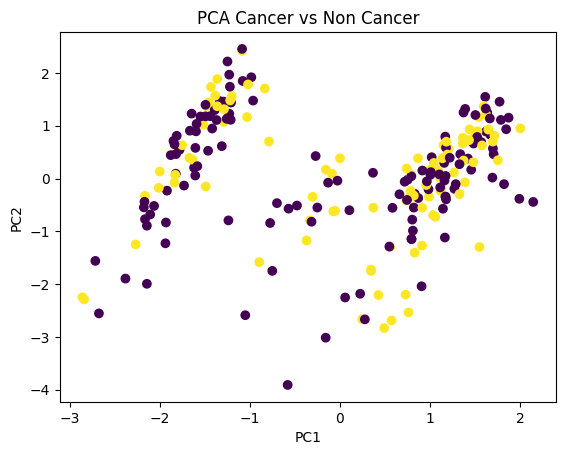

In [106]:
import matplotlib.pyplot as plt

plt.scatter(df_pca_final['PC1'], df_pca_final['PC2'], c=df_pca_final['early_onset_proxy'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Cancer vs Non Cancer')
plt.show()